# Data Visualization Notebook

## Objectives
###   To conduct a study to visually differentiate a healthy cherry leaf from one with powdery mildew.


## Inputs

project5_cherryleaves/jupyter_notebooks/inputs/train
project5_cherryleaves/jupyter_notebooks/inputs/test
project5_cherryleaves/jupyter_notebooks/inputs/validation

## Outputs


- Image shape embeddings pickle file
- Mean and variability of images per label plot
- Plot to distinguish contrast between parasite-contained and uninfected cell images
- Generate code that answers business requirement 1 and can be used to build image montage on Streamlit dashboard

# Additional Comments | Insights | Conclusions

# Set Data Directory

## Import Libararies

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

In [2]:
!pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 164.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 151.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 150.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 161.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 58.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.24.4 which is incompatible.
tensorflow-cpu 2.6.0 requires typing-extensions~=3.7.4, but you have typing-exte

## Set Working Directory

In [3]:
import os

cwd = os.getcwd()
print("Current working directory:", cwd)


Current working directory: /workspace/project5_cherryleaves/jupyter_notebooks


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/project5_cherryleaves/jupyter_notebooks'

## Set Input Directory

In [5]:
my_data_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'


## Set Output Directory 

In [6]:
import os

# Define input directories
my_data_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/'
train_path = os.path.join(my_data_dir, 'train')
val_path = os.path.join(my_data_dir, 'validation')
test_path = os.path.join(my_data_dir, 'test')

# Define output directory
output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/'

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Optionally, define version-specific output directory
version = 'v1'
version_output_dir = os.path.join(output_dir, version)

# Create version-specific output directory if it doesn't exist
if not os.path.exists(version_output_dir):
    os.makedirs(version_output_dir)


## Set label Names

In [9]:
import os

labels = os.listdir(train_path)
print('Labels for the images are:', labels)


Labels for the images are: ['healthy', 'powdery_mildew']


# Data visualisation of image data

This section provides visualization of sample images from two directories: 'healthy' and 'powdery_mildew'. The code performs the following tasks:

Load and Prepare Directories:

Paths to directories containing images for each label are specified.
Function to Visualize and Save Images:

visualize_images function:
Loads images from the specified directory.
Creates an output directory for the label if it does not exist.
Visualizes a sample of up to 5 images in a grid format.
Saves the visualized images in the designated output directory.
Execution:

The function is applied to both the 'healthy' and 'powdery_mildew' directories, saving the visualizations in the specified output path.

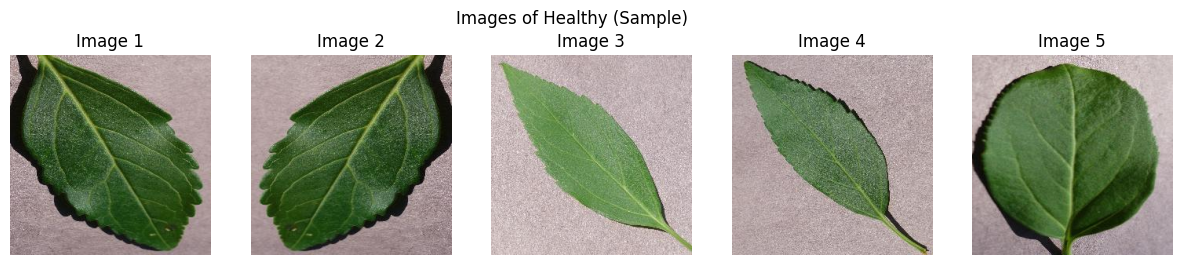

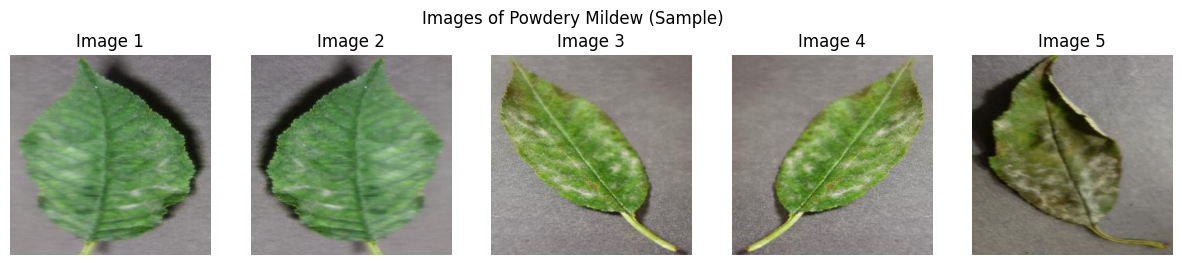

In [10]:
import os
import matplotlib.pyplot as plt
from skimage.io import imread

#  paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

#  output directory
output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/train'

# Function to visualize images in a directory and save them
def visualize_images(directory, label):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Check if there are any images in the directory
    if not image_files:
        print(f"No images found in directory: {directory}")
        return
    
    # Create output directory for the label if it doesn't exist
    output_label_dir = os.path.join(output_dir, label)
    os.makedirs(output_label_dir, exist_ok=True)
    
    # Plot the images
    num_images = min(len(image_files), 5)  # Limit to maximum 5 images for visualization
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    fig.suptitle(f'Images of {label} (Sample)')
    
    # Save and display the images
    for i in range(num_images):
        image_filename = f'image_{i+1}.jpg'  # Save as JPEG
        image_path = os.path.join(directory, image_files[i])
        image = imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f'Image {i+1}')
        
        # Save the image
        output_image_path = os.path.join(output_label_dir, image_filename)
        plt.imsave(output_image_path, image, format='jpg')

    plt.show()

# Visualize and save images in the 'healthy' directory
visualize_images(healthy_dir, 'Healthy')

# Visualize and save images in the 'powdery_mildew' directory
visualize_images(powdery_mildew_dir, 'Powdery Mildew')



## Image shape and Compute average images' size on train set

 This calculates and visualizes the average dimensions of images within two training set directories: 'healthy' and 'powdery_mildew'

In [8]:
!pip install --upgrade numpy scikit-image


In [1]:
import os
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Function to visualize images in a directory and compute average image size
def visualize_and_compute_avg_size(directory, label):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Check if there are any images in the directory
    if not image_files:
        print(f"No images found in directory: {directory}")
        return None
    
    # Compute image shape average
    dim1, dim2 = [], []
    for image_filename in image_files:
        image_path = os.path.join(directory, image_filename)
        img = imread(image_path)
        d1, d2, _ = img.shape
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width
    
    # Compute average image size
    avg_size = (int(np.mean(dim1)), int(np.mean(dim2)))
    print(f"Average image size in {label} set: {avg_size}")
    return avg_size

# Compute average image size for 'healthy' images
avg_size_healthy = visualize_and_compute_avg_size(healthy_dir, 'Healthy')

# Compute average image size for 'powdery_mildew' images
avg_size_powdery_mildew = visualize_and_compute_avg_size(powdery_mildew_dir, 'Powdery Mildew')

# Print the computed data
print("Computed data:")
print("Average size of healthy images:", avg_size_healthy)
print("Average size of powdery mildew images:", avg_size_powdery_mildew)


Average image size in Healthy set: (256, 256)
Average image size in Powdery Mildew set: (256, 256)
Computed data:
Average size of healthy images: (256, 256)
Average size of powdery mildew images: (256, 256)


## Average and variability of images per label
## Function to load images in an array (tensor)

 This calculates the average image dimensions and their variability for two categories: "healthy" and "powdery mildew. The result should include the average size and standard deviation for both image dimensions (height and width) within each label. If no images are found in a directory, it reports this accordingly.

In [4]:
!pip install --upgrade tensorflow numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.6/479.6 MB 4.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 136.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 143.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 139.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 110.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 131.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 162.4 MB/s eta 0:00:0000:01
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-

In [1]:
import os
import json
import numpy as np
from skimage.io import imread
from tensorflow.keras.preprocessing import image

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Define the output directory
output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs'

# Function to compute image shape average and standard deviation
def compute_image_shape(directory):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Get image shapes
    shapes = []
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = image.load_img(image_path)
        img_array = image.img_to_array(img)
        shapes.append(img_array.shape[:2])  # Extract height and width
        print(f"Loaded image: {image_file}, shape: {img_array.shape}")
    
    shapes = np.array(shapes)
    if len(shapes) > 0:
        mean_shape = np.mean(shapes, axis=0)
        std_shape = np.std(shapes, axis=0)
    else:
        mean_shape = np.nan
        std_shape = np.nan
    
    return mean_shape, std_shape

# Compute image shapes for healthy and powdery mildew sets
avg_healthy_shape, std_healthy_shape = compute_image_shape(healthy_dir)
avg_powdery_mildew_shape, std_powdery_mildew_shape = compute_image_shape(powdery_mildew_dir)

# Save computed data
computed_data = {
    'healthy': {
        'average_shape': avg_healthy_shape.tolist() if np.isnan(avg_healthy_shape).any() else None,
        'std_shape': std_healthy_shape.tolist() if np.isnan(std_healthy_shape).any() else None
    },
    'powdery_mildew': {
        'average_shape': avg_powdery_mildew_shape.tolist() if np.isnan(avg_powdery_mildew_shape).any() else None,
        'std_shape': std_powdery_mildew_shape.tolist() if np.isnan(std_powdery_mildew_shape).any() else None
    }
}

computed_data_path = os.path.join(output_dir, 'computed_data.json')
with open(computed_data_path, 'w') as f:
    json.dump(computed_data, f)

# Print average image sizes
if np.isnan(avg_healthy_shape).any():
    print("No images found in Healthy set.")
else:
    print(f"Average image size in Healthy set: ({avg_healthy_shape[0]:.0f}, {avg_healthy_shape[1]:.0f}) with std deviation: ({std_healthy_shape[0]:.2f}, {std_healthy_shape[1]:.2f})")

if np.isnan(avg_powdery_mildew_shape).any():
    print("No images found in Powdery Mildew set.")
else:
    print(f"Average image size in Powdery Mildew set: ({avg_powdery_mildew_shape[0]:.0f}, {avg_powdery_mildew_shape[1]:.0f}) with std deviation: ({std_powdery_mildew_shape[0]:.2f}, {std_powdery_mildew_shape[1]:.2f})")

output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/v1'
computed_data_path = os.path.join(output_dir, 'computed_data.json')


2024-05-17 20:40:43.123859: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 20:40:43.159799: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 20:40:43.160923: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 20:40:44.016782: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG, shape: (256, 256, 3)
Loaded image: 002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG, shape: (256, 256, 3)
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG, shape: (256, 256, 3)
Loaded image: ecc0acef-85ea-49bc-9275-79880a6a0f80___JR_HL 9616.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_180deg.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_flipTB.JPG, shape: (256, 256, 3)
Loaded image: ecc0acef-85ea-49bc-9275-79880a6a0f80___JR_HL 9616_180deg.JPG, shape: (256, 256, 3)
Loaded image: 01958ee7-f585-4956-90aa-a40dc79102d4___JR_HL 9836.J

## Load image shape and labels in array

Loads images from specified directories, computes their dimensions, and calculates statistical measures for each label category ("healthy" and "powdery mildew"). The results provide insights into the average image size and its variability, helping in understanding the dataset's characteristics and ensuring consistency in preprocessing.

In [1]:
import os
import json
import numpy as np
from skimage.io import imread

# Suppress deprecation warning for np.object in TensorFlow import
import warnings
warnings.filterwarnings("ignore", message="numpy\\.object was deprecated")

from tensorflow.keras.preprocessing import image

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Define the output directory
output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs'

# Function to compute image shape average and standard deviation
def compute_image_shape(directory):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Get image shapes
    shapes = []
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = image.load_img(image_path)
        img_array = image.img_to_array(img)
        shapes.append(img_array.shape[:2])  # Extract height and width
        print(f"Loaded image: {image_file}, shape: {img_array.shape}")
    
    shapes = np.array(shapes)
    if len(shapes) > 0:
        mean_shape = np.mean(shapes, axis=0)
        std_shape = np.std(shapes, axis=0)
    else:
        mean_shape = np.nan
        std_shape = np.nan
    
    return mean_shape, std_shape

# Compute image shapes for healthy and powdery mildew sets
avg_healthy_shape, std_healthy_shape = compute_image_shape(healthy_dir)
avg_powdery_mildew_shape, std_powdery_mildew_shape = compute_image_shape(powdery_mildew_dir)

# Save computed data
computed_data = {
    'healthy': {
        'average_shape': avg_healthy_shape.tolist() if np.isnan(avg_healthy_shape).any() else None,
        'std_shape': std_healthy_shape.tolist() if np.isnan(std_healthy_shape).any() else None
    },
    'powdery_mildew': {
        'average_shape': avg_powdery_mildew_shape.tolist() if np.isnan(avg_powdery_mildew_shape).any() else None,
        'std_shape': std_powdery_mildew_shape.tolist() if np.isnan(std_powdery_mildew_shape).any() else None
    }
}

computed_data_path = os.path.join(output_dir, 'computed_data.json')
with open(computed_data_path, 'w') as f:
    json.dump(computed_data, f)

# Print average image sizes
if np.isnan(avg_healthy_shape).any():
    print("No images found in Healthy set.")
else:
    print(f"Average image size in Healthy set: ({avg_healthy_shape[0]:.0f}, {avg_healthy_shape[1]:.0f}) with std deviation: ({std_healthy_shape[0]:.2f}, {std_healthy_shape[1]:.2f})")

if np.isnan(avg_powdery_mildew_shape).any():
    print("No images found in Powdery Mildew set.")
else:
    print(f"Average image size in Powdery Mildew set: ({avg_powdery_mildew_shape[0]:.0f}, {avg_powdery_mildew_shape[1]:.0f}) with std deviation: ({std_powdery_mildew_shape[0]:.2f}, {std_powdery_mildew_shape[1]:.2f})")

output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/v1'
computed_data_path = os.path.join(output_dir, 'computed_data.json')


2024-05-17 20:41:08.534219: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 20:41:08.572456: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 20:41:08.573383: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 20:41:09.450085: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG, shape: (256, 256, 3)
Loaded image: 002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG, shape: (256, 256, 3)
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG, shape: (256, 256, 3)
Loaded image: ecc0acef-85ea-49bc-9275-79880a6a0f80___JR_HL 9616.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_180deg.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_flipTB.JPG, shape: (256, 256, 3)
Loaded image: ecc0acef-85ea-49bc-9275-79880a6a0f80___JR_HL 9616_180deg.JPG, shape: (256, 256, 3)
Loaded image: 01958ee7-f585-4956-90aa-a40dc79102d4___JR_HL 9836.J

## Plot and save mean and variability of images per label

 Visualizes and saves the mean dimensions (height and width) of images categorized by labels. The visualization helps in understanding the distribution and variability of image sizes within each category, which is crucial for preprocessing and model training. 

Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG, shape: (256, 256, 3), label: 0
Loaded image: 002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG, shape: (256, 256, 3), label: 0
Loaded image: ecc0acef-85ea-49bc-9275-79880a6a0f80___JR_HL 9616.JPG, shape: (256, 256, 3), label: 0
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165.JPG, shape: (256, 256, 3), label: 0
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_180deg.JPG, shape: (256, 256, 3), label: 0
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_flipTB.JPG, shape: (256, 256, 3), label: 0
Loaded image: ecc0acef-85ea-49bc-9275-79880a6a0f80___JR_HL 9616_180deg.J

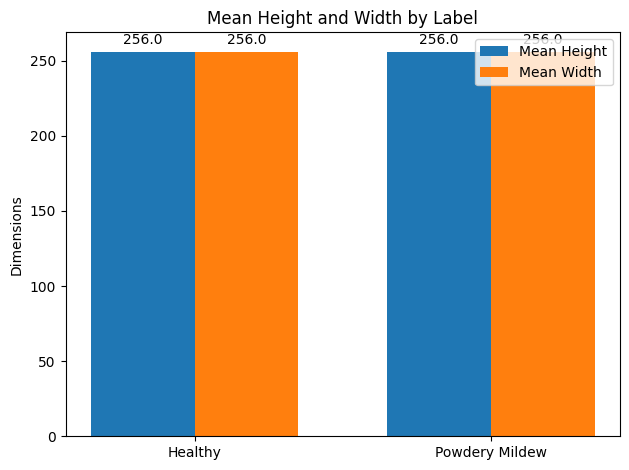

In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Define the output directory
output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs'

# Function to load images and extract their shapes and labels
def load_images(directory, label):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Load images, extract shapes, and assign labels
    shapes = []
    labels = []
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = image.load_img(image_path)
        img_array = image.img_to_array(img)
        shapes.append(img_array.shape[:2])  # Extract height and width
        labels.append(label)
        print(f"Loaded image: {image_file}, shape: {img_array.shape}, label: {label}")
    
    return shapes, labels

# Load images and extract shapes and labels for healthy and powdery mildew sets
healthy_shapes, _ = load_images(healthy_dir, 0)
powdery_mildew_shapes, _ = load_images(powdery_mildew_dir, 1)

# Calculate mean and std deviation of image shapes for each label
healthy_mean_shape = np.mean(healthy_shapes, axis=0)
powdery_mildew_mean_shape = np.mean(powdery_mildew_shapes, axis=0)
healthy_std_shape = np.std(healthy_shapes, axis=0)
powdery_mildew_std_shape = np.std(powdery_mildew_shapes, axis=0)

# Plot and save mean and std deviation
labels = ['Healthy', 'Powdery Mildew']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [healthy_mean_shape[0], powdery_mildew_mean_shape[0]], width, label='Mean Height')
rects2 = ax.bar(x + width/2, [healthy_mean_shape[1], powdery_mildew_mean_shape[1]], width, label='Mean Width')

ax.set_ylabel('Dimensions')
ax.set_title('Mean Height and Width by Label')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig(os.path.join(output_dir, 'mean_dimensions_per_label.png'))
plt.show()


## Compute average and variability images

Calculates and saves the average and variability images from a set of images in a specified directory. These images provide insights into a typical appearance and variability of the image dataset, useful for understanding and preprocessing the data.

In [4]:
pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 15.0 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [3]:
!sudo apt-get install libgl1-mesa-glx

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libgl1-mesa-glx


In [4]:
!sudo apt-get update

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://download.docker.com/linux/ubuntu jammy InRelease [48.8 kB]       
Get:3 https://ppa.launchpadcontent.net/git-core/ppa/ubuntu jammy InRelease [24.6 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy InRelease [270 kB]                
Get:5 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,848 kB]
Get:6 https://download.docker.com/linux/ubuntu jammy/stable amd64 Packages [38.5 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,083 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.7 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,383 kB]
Get:10 https://ppa.launchpadcontent.net/git-core/ppa/ubuntu jammy/main amd64 Packages [2,971 B]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]       
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRel

In [1]:
!echo "Y" | sudo apt-get install libgl1-mesa-glx


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libgl1 libgl1-amber-dri libgl1-mesa-dri libglapi-mesa libglvnd0
  libglx-mesa0 libglx0 libllvm15 libpciaccess0 libsensors-config libsensors5
  libx11-xcb1 libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0
  libxcb-randr0 libxcb-sync1 libxcb-xfixes0 libxfixes3 libxshmfence1
  libxxf86vm1
Suggested packages:
  pciutils lm-sensors
The following NEW packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libgl1 libgl1-amber-dri libgl1-mesa-dri libgl1-mesa-glx
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libllvm15 libpciaccess0
  libsensors-config libsensors5 libx11-xcb1 libxcb-dri2-0 libxcb-dri3-0
  libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-sync1 libxcb-xfixes0
  libxfixes3 libxshmfence

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute average and variability images
def compute_avg_and_variability_images(image_directory, output_directory):
    image_files = [f for f in os.listdir(image_directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    if len(image_files) == 0:
        print("No image files found in the specified directory.")
        return None, None

    # Read the first image to get dimensions
    first_image = cv2.imread(os.path.join(image_directory, image_files[0]))
    height, width, _ = first_image.shape
    
    # Initialize arrays for sum and sum of squares
    sum_image = np.zeros((height, width, 3), dtype=np.float64)
    sum_sq_image = np.zeros((height, width, 3), dtype=np.float64)
    
    # Compute sum and sum of squares
    for image_file in image_files:
        image = cv2.imread(os.path.join(image_directory, image_file)).astype(np.float64)
        sum_image += image
        sum_sq_image += np.square(image)
    
    # Compute average and variability images
    avg_image = (sum_image / len(image_files)).astype(np.uint8)
    var_image = np.sqrt((sum_sq_image / len(image_files)) - np.square(avg_image))
    
    # Normalize the variability image to the range of 0 to 255
    var_image_normalized = (var_image - var_image.min()) / (var_image.max() - var_image.min()) * 255
    
    # Convert the normalized variability image to uint8 data type
    var_image_uint8 = var_image_normalized.astype(np.uint8)
    
    # Save images to the output directory
    avg_image_path = os.path.join(output_directory, "average_image.png")
    var_image_path = os.path.join(output_directory, "variability_image.png")
    
    cv2.imwrite(avg_image_path, cv2.cvtColor(avg_image, cv2.COLOR_BGR2RGB))
    cv2.imwrite(var_image_path, cv2.cvtColor(var_image_uint8, cv2.COLOR_BGR2RGB))
    
    return avg_image_path, var_image_path

# Example usage
image_directory = "/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy"
output_directory = "/workspace/project5_cherryleaves/jupyter_notebooks/outputs/v1"
avg_image_path, var_image_path = compute_avg_and_variability_images(image_directory, output_directory)

if avg_image_path and var_image_path:
    print("Average image saved to:", avg_image_path)
    print("Variability image saved to:", var_image_path)


Average image saved to: /workspace/project5_cherryleaves/jupyter_notebooks/outputs/v1/average_image.png
Variability image saved to: /workspace/project5_cherryleaves/jupyter_notebooks/outputs/v1/variability_image.png


## Difference between powdery mildew leaves and healthy leaves

In [ ]:
 Calculates and compares the average dimensions (height and width) of leaves affected by powdery mildew with healthy leaves.
This comparison helps in understanding the typical size variations between the two categories,
which could be useful for distinguishing between healthy and infected leaves.

In [3]:
import os
import json
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Function to load images and extract their shapes
def load_images(directory):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Load images and extract shapes
    shapes = []
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = image.load_img(image_path)
        img_array = image.img_to_array(img)
        shapes.append(img_array.shape[:2])  # Extract height and width
        print(f"Loaded image: {image_file}, shape: {img_array.shape}")
    
    return shapes

# Load images and extract shapes for healthy and powdery mildew sets
healthy_shapes = load_images(healthy_dir)
powdery_mildew_shapes = load_images(powdery_mildew_dir)

# Calculate mean image shapes for each label
healthy_mean_shape = np.mean(healthy_shapes, axis=0)
powdery_mildew_mean_shape = np.mean(powdery_mildew_shapes, axis=0)

# Calculate the difference between the average healthy and average powdery mildew images
difference = powdery_mildew_mean_shape - healthy_mean_shape

print("Difference between average powdery mildew and average healthy images:")
print(f"Height difference: {difference[0]:.2f}")
print(f"Width difference: {difference[1]:.2f}")


2024-05-17 20:46:38.964849: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 20:46:39.002356: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 20:46:39.002888: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 20:46:39.844052: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG, shape: (256, 256, 3)
Loaded image: 002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG, shape: (256, 256, 3)
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG, shape: (256, 256, 3)
Loaded image: ecc0acef-85ea-49bc-9275-79880a6a0f80___JR_HL 9616.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_180deg.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_flipTB.JPG, shape: (256, 256, 3)
Loaded image: ecc0acef-85ea-49bc-9275-79880a6a0f80___JR_HL 9616_180deg.JPG, shape: (256, 256, 3)
Loaded image: 01958ee7-f585-4956-90aa-a40dc79102d4___JR_HL 9836.J

## Image Montage with labels

Creates and visualizes image montages for leaves categorized as healthy and powdery mildew. This helps in visualizing the differences between leaf conditions by creating a clear, labeled visual representation of sample images.

Number of images found in directory '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy': 1930


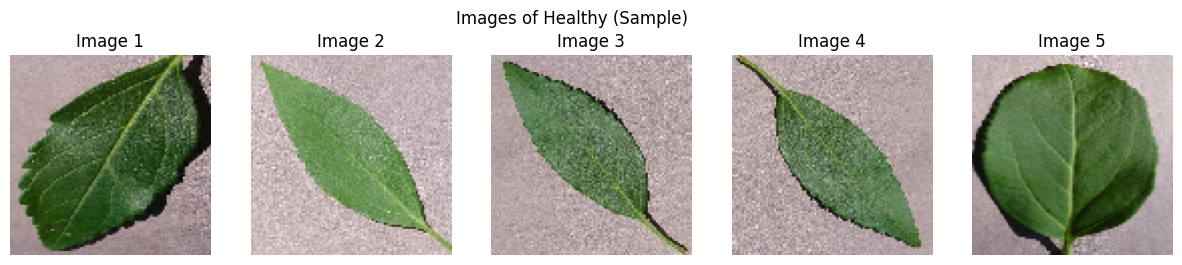

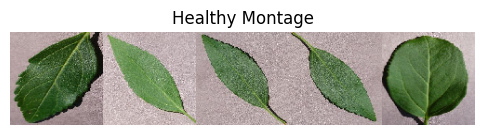

Number of images found in directory '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew': 1928


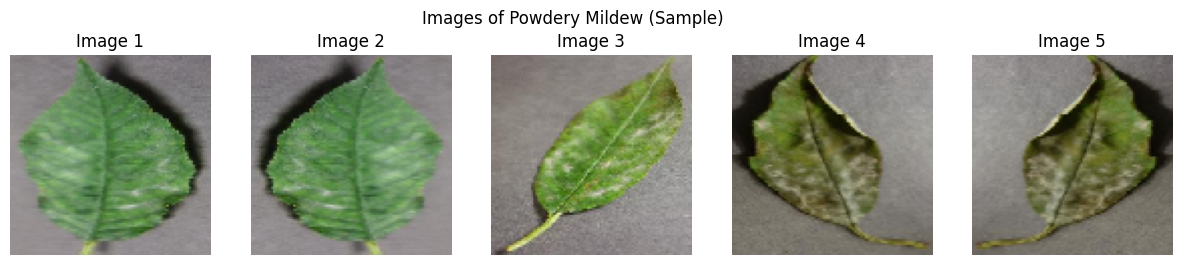

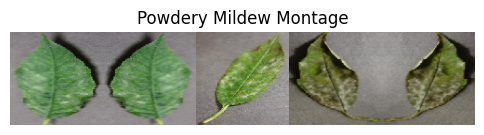

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image
from skimage.io import imread
from keras.preprocessing import image

# Define the paths to the directories containing images
healthy_input_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_input_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'
healthy_output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/train/healthy'
powdery_mildew_output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/train/powdery_mildew'

# Function to visualize images in a directory, save them, load and resize them, and create a montage
def process_images(input_directory, output_directory, label):
    # Get list of image files in the input directory
    image_files = [f for f in os.listdir(input_directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Check if there are any images in the directory
    if not image_files:
        print(f"No images found in directory: {input_directory}")
        return
    
    # Print number of images found
    print(f"Number of images found in directory '{input_directory}': {len(image_files)}")
    
    # Create output directory for the label if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)
    
    # Plot the images
    num_images = min(len(image_files), 5)  # Limit to maximum 5 images for visualization
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    fig.suptitle(f'Images of {label} (Sample)')
    
    # Load, resize, and create montage
    images = []
    for i, image_file in enumerate(image_files[:num_images]):
        input_image_path = os.path.join(input_directory, image_file)
        output_image_path = os.path.join(output_directory, image_file)
        
        # Load image
        img = image.load_img(input_image_path, target_size=(100, 100))
        
        # Resize image
        img_resized = img.resize((100, 100))
        
        # Save resized image
        img_resized.save(output_image_path)
        
        # Append resized image to list for montage
        images.append(img_resized)
        
        # Display image
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Image {i+1}')
    
    # Create image montage
    montage = create_image_montage(images)
    
    # Display montage
    plt.figure(figsize=(6, 4))
    plt.imshow(montage)
    plt.title(f'{label} Montage')
    plt.axis('off')
    plt.show()

# Function to create image montage
def create_image_montage(images, montage_shape=(1, 5), montage_size=(500, 100)):
    montage = Image.new('RGB', montage_size)
    width, height = images[0].size
    x_offset = 0
    y_offset = 0
    for img in images:
        montage.paste(img, (x_offset, y_offset))
        x_offset += width
        if x_offset >= montage_size[0]:
            x_offset = 0
            y_offset += height
    return montage

# Process images for healthy and powdery mildew sets
process_images(healthy_input_dir, healthy_output_dir, 'Healthy')
process_images(powdery_mildew_input_dir, powdery_mildew_output_dir, 'Powdery Mildew')


Git Commands 

Updates the repository with new image montage work, ensuring that the latest changes are recorded and shared.

In [5]:
! git status


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../app_pages/Powdery_mildew_detection.py
	modified:   DataVisualization.ipynb
	modified:   outputs/computed_data.json

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	outputs/train/healthy/0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG
	outputs/train/powdery_mildew/00d12ac0-a293-47e0-a4c6-a80f37204c39___FREC_Pwd.M 4812_flipLR.JPG
	outputs/v1/

no changes added to commit (use "git add" and/or "git commit -a")


In [6]:
!git add .

In [7]:
!git commit -am "creating the  image montage for the cherry leaves "

[main b113c114] creating the  image montage for the cherry leaves
 7 files changed, 7720 insertions(+), 4807 deletions(-)
 create mode 100644 jupyter_notebooks/outputs/train/healthy/0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG
 create mode 100644 jupyter_notebooks/outputs/train/powdery_mildew/00d12ac0-a293-47e0-a4c6-a80f37204c39___FREC_Pwd.M 4812_flipLR.JPG
 create mode 100644 jupyter_notebooks/outputs/v1/average_image.png
 create mode 100644 jupyter_notebooks/outputs/v1/variability_image.png


In [ ]:
!git push


Enumerating objects: 26, done.
Counting objects: 100% (26/26), done.
Delta compression using up to 16 threads
Compressing objects: 100% (16/16), done.
Writing objects: 100% (16/16), 166.27 KiB | 1.85 MiB/s, done.
Total 16 (delta 7), reused 2 (delta 0), pack-reused 0
